In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [3]:
#Q2-Get first 2 rows of data

df.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [4]:
#Q3-Check if there is missing value

df.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [5]:
#Q4- Get data information and number of rows and columns

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB
None
(6000, 8)


In [6]:
#Q5-Get descriptive statistics of data

df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


<AxesSubplot:>

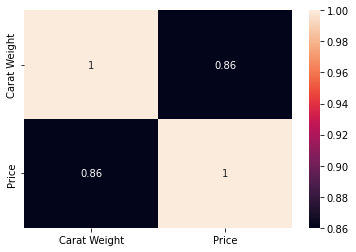

In [7]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
 
fig, ax = plt.subplots() 
sns.heatmap(df.corr().round(2),ax=ax,annot=True)

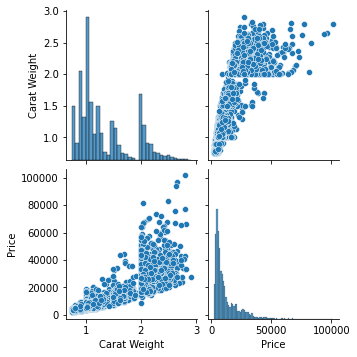

In [8]:
#Q7-Use seasoborns paiplot to generate following  diagram

sns.pairplot(df)
plt.show()

In [18]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)

y = df['Price']
X = df.drop(columns=['Price'])

In [19]:
#Q9-Create dummy for the input variables (X)

X = pd.get_dummies(X)

In [20]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4800, 29)
(4800,)
(1200, 29)
(1200,)


In [21]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [23]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

Train results:
MSE: 13876709.09069555
RMSE: 3725.1455126874644
MAE: 2418.9229331138126
MAPE: 28.637922008245308
R-Squared: 0.863157621717345


Test results:
MSE: 15437053.970543047
RMSE: 3929.001650615974
MAE: 2455.4552285560726
MAPE: 28.054064976901582
R-Squared: 0.8630462514508336


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

Answer: Based on the results, we cannot say that there is overfitting. Because both train and test performances are quite bad. Therefore, there is NOT overfitting here.

In [24]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric

from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

Train results:
MSE: 13879031.621299988
RMSE: 3725.4572365415747
MAE: 2416.7197299603667
MAPE: 28.588386199749994
R-Squared: 0.8631347185484832


Test results:
MSE: 15515455.055538379
RMSE: 3938.9662419901974
MAE: 2455.0442987776905
MAPE: 28.011956067288544
R-Squared: 0.8623506962949778


In [25]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

Train results:
MSE: 13897533.132450096
RMSE: 3727.939529076363
MAE: 2418.593908351086
MAPE: 28.635098172808547
R-Squared: 0.8629522696140091


Test results:
MSE: 15733263.07531107
RMSE: 3966.5177517957827
MAE: 2460.780413376941
MAPE: 28.051294918831093
R-Squared: 0.8604183570786443


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? 

Answer: No, we do not see that much improvement. This is because our model was not overfitting. If LinearRegression would overfit the data, then Lasso or Ridge regression would solve the issue.

In [26]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

Train results:
MSE: 96734.54180357144
RMSE: 311.0217706263847
MAE: 80.92800892857143
MAPE: 0.7820384651456229
R-Squared: 0.9990460717540472


Test results:
MSE: 3970990.2787584043
RMSE: 1992.734372353326
MAE: 925.4439702380953
MAPE: 7.218901176652063
R-Squared: 0.964770350277584


In [27]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train results:')
evalmetric(y_train, y_train_pred)
print('\n\nTest results:')
evalmetric(y_test, y_test_pred)

Train results:
MSE: 411286.8913160049
RMSE: 641.3165297386346
MAE: 301.3385300445966
MAPE: 2.4308953439265744
R-Squared: 0.995944176966144


Test results:
MSE: 2258360.8499102737
RMSE: 1502.7843657392345
MAE: 717.2331271127715
MAPE: 5.590153991662888
R-Squared: 0.979964377622694


Q18-Why Random forest perform better than Decison Tree on test data?

Answer: Because RandomForest takes many decision trees and gets majority vote of them. With this way, we increase the performance making sure that our result is not only based one single tree.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?


Random Forest. It is because Linear Regression approaches decision boundaries as linear, which is not good everytime. Also, Ridge and Lasso regressions are not good because there is not overfitting case with linear regression. Lastly, Random Forest outperforms Decision Tree since it takes many decision trees.